In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [82]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [83]:
heart=pd.read_csv(r'heart.csv')

In [84]:
heart

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
heart.shape

(303, 14)

In [86]:
heart.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [87]:
heart.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
gender:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [90]:
heart.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
heart['target'].unique()

array([1, 0], dtype=int64)

1 --> Defective Heart

0 --> Healthy Heart

### Data Exploration

In [92]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

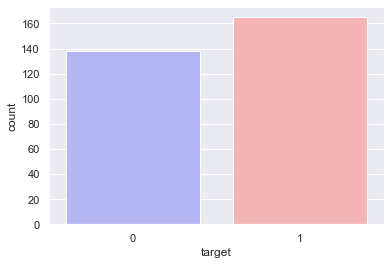

In [93]:
sns.countplot(x='target',data=heart,palette='bwr')
plt.show()

In [94]:
countofNoDisease = len(heart[heart.target==0])
countofHaveDisease = len(heart[heart.target==1])
print("Percentage of Patients who Don't Heart Disease: {:.2f}%".format((countofDisease / (len(heart.target))*100)))
print("Percentage of Patients who Have Heart Disease: {:.2f}%".format((countofHaveDisease / (len(heart.target))*100)))

Percentage of Patients who Don't Heart Disease: 45.54%
Percentage of Patients who Have Heart Disease: 54.46%


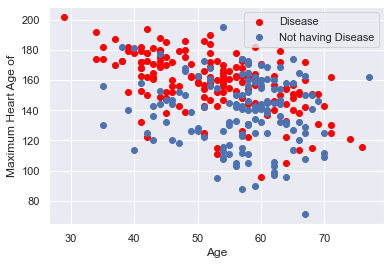

In [95]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c='red')
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(['Disease', 'Not having Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Age of')
plt.show()

<AxesSubplot:>

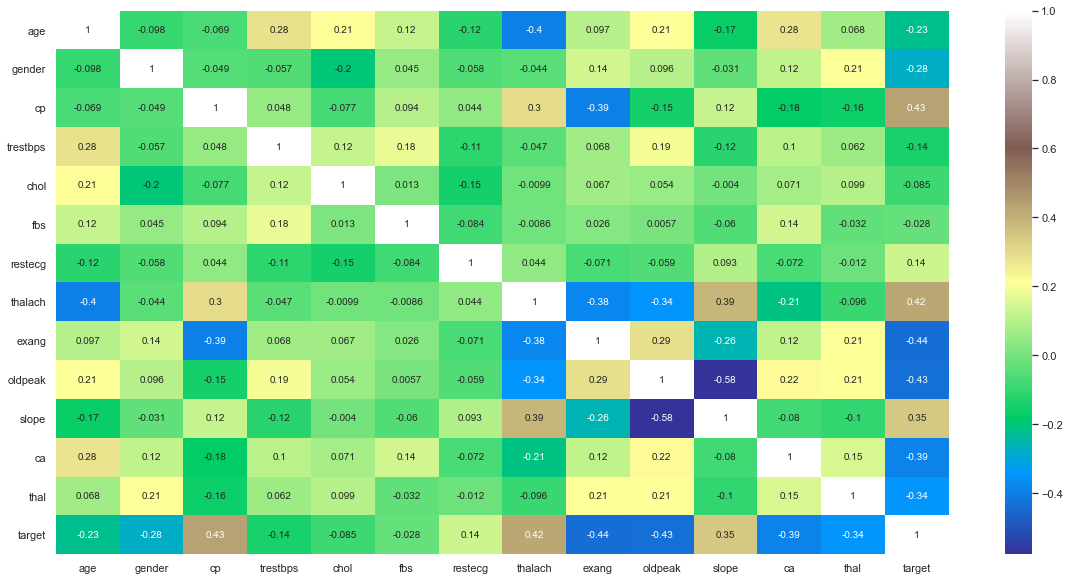

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(heart.corr(), annot=True, cmap='terrain')

we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

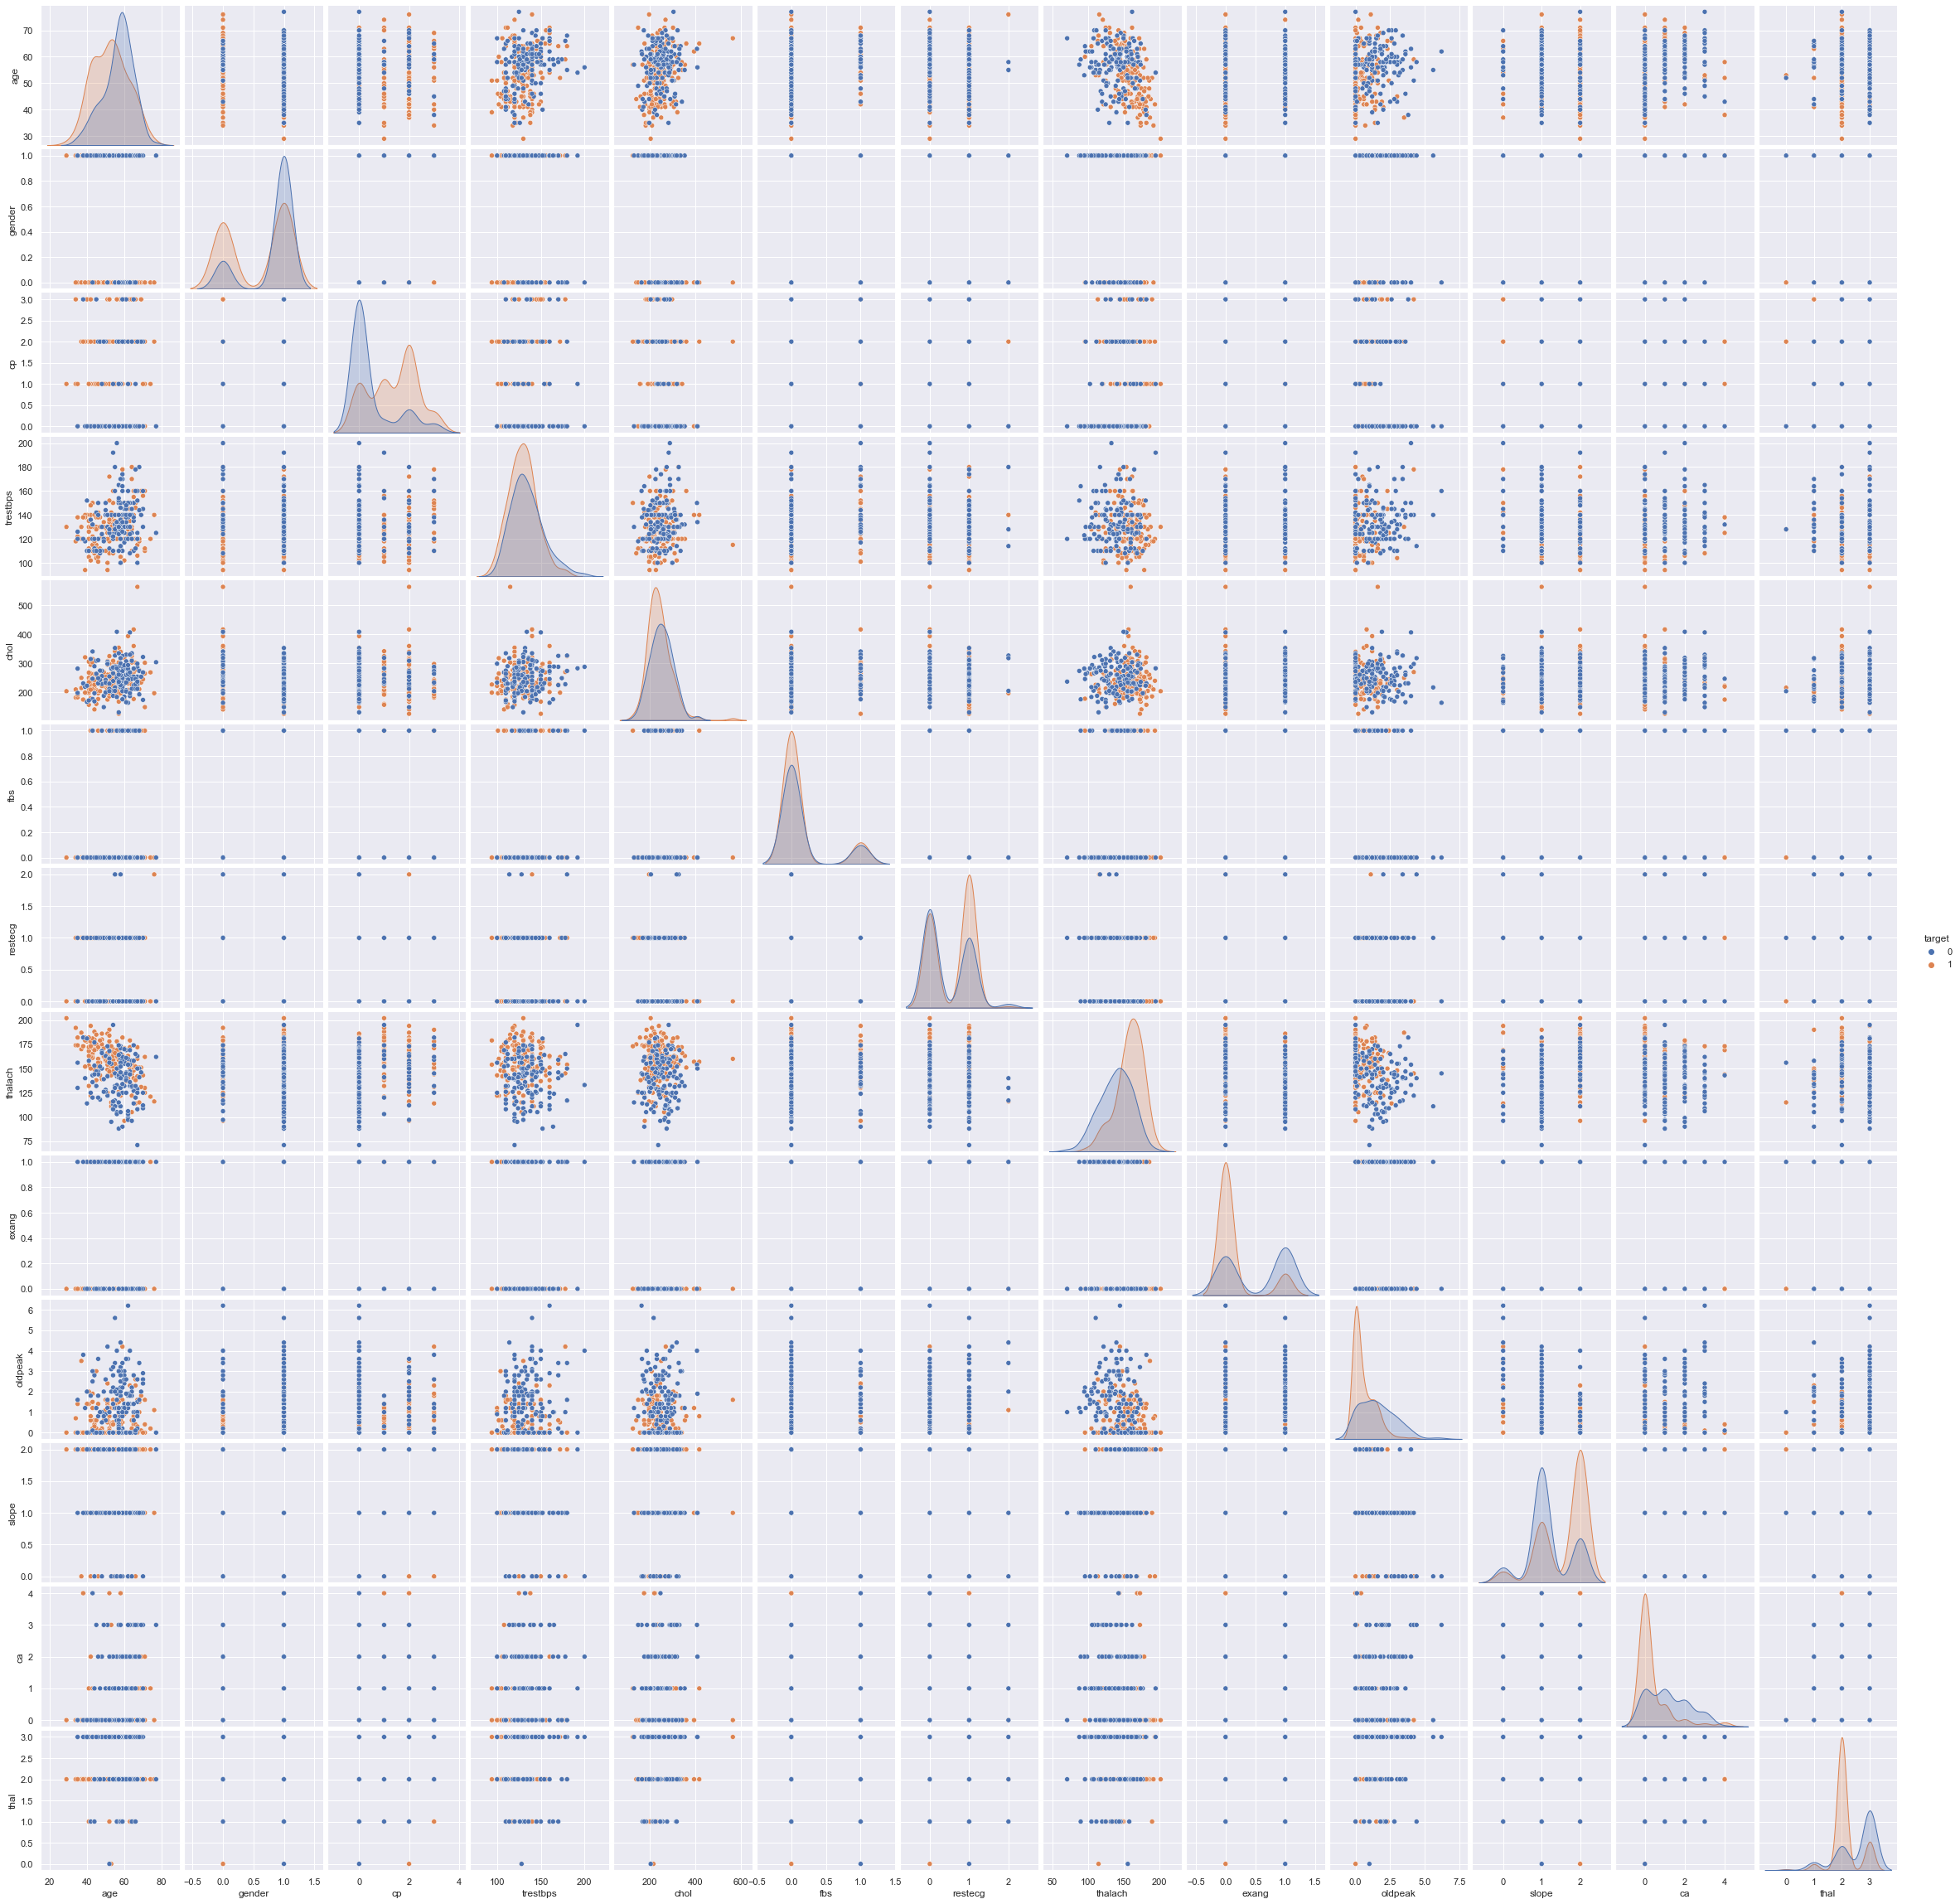

In [97]:
sns.pairplot(heart,hue="target")s

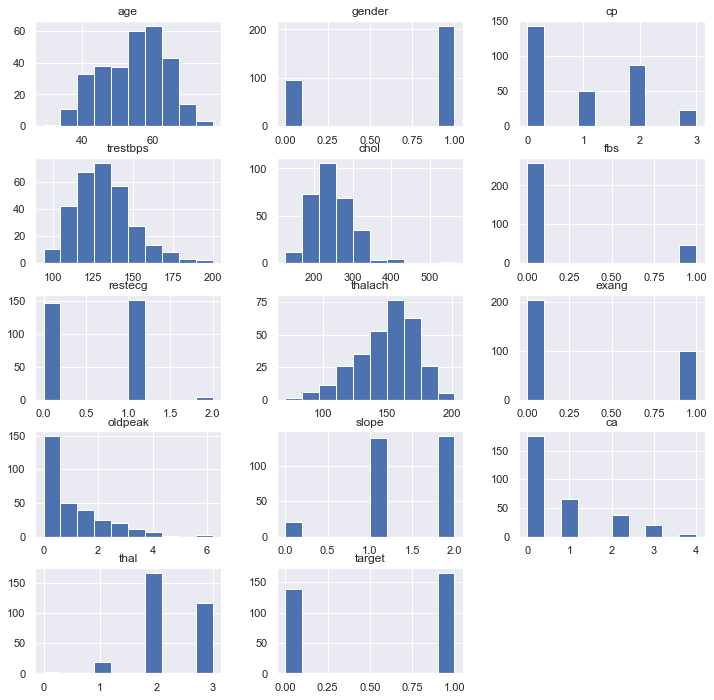

In [98]:
heart.hist(figsize=(12,12), layout=(5,3));

In [99]:
heart.groupby('target').mean()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


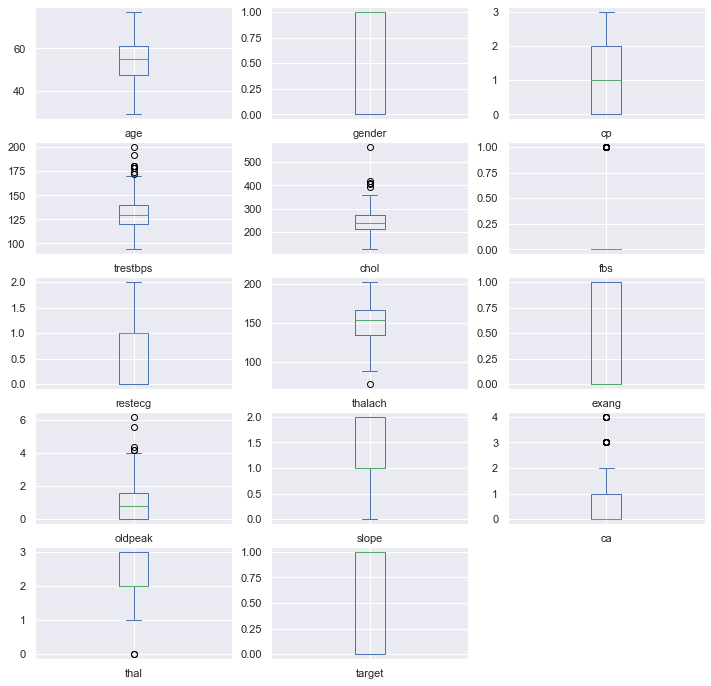

In [100]:
# box and whiskers plot
heart.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

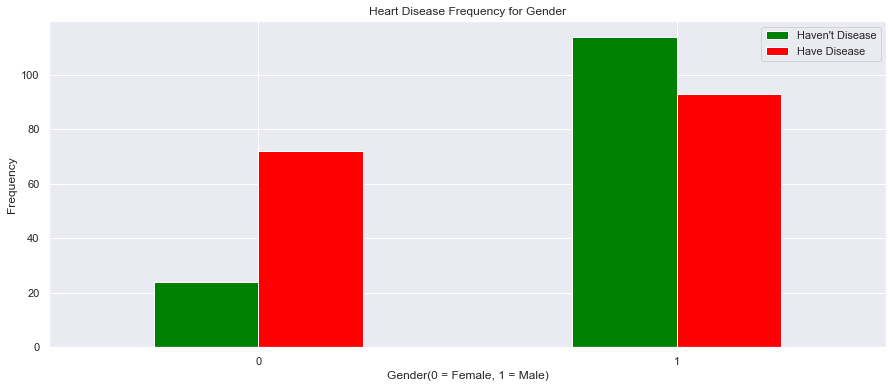

In [101]:
#male vs female
pd.crosstab(heart.gender, heart.target).plot(kind='bar', figsize=(15,6),color=['green', 'red'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Gender(0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

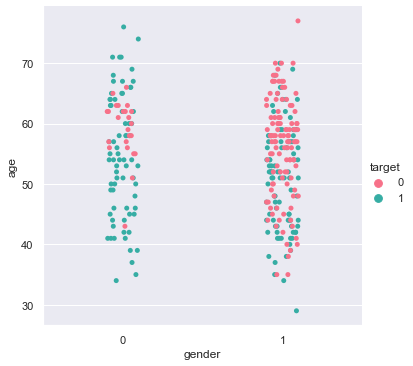

In [102]:
sns.catplot(data=heart, x='gender', y='age',  hue='target', palette='husl')

<AxesSubplot:xlabel='thal', ylabel='Density'>

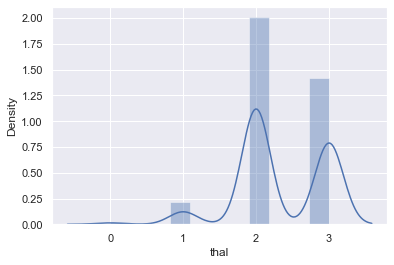

In [103]:
sns.distplot(heart["thal"])

<AxesSubplot:xlabel='chol', ylabel='Density'>

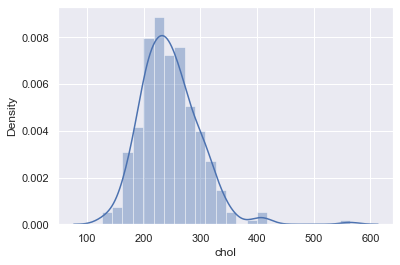

In [104]:
sns.distplot(heart["chol"])

In [105]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

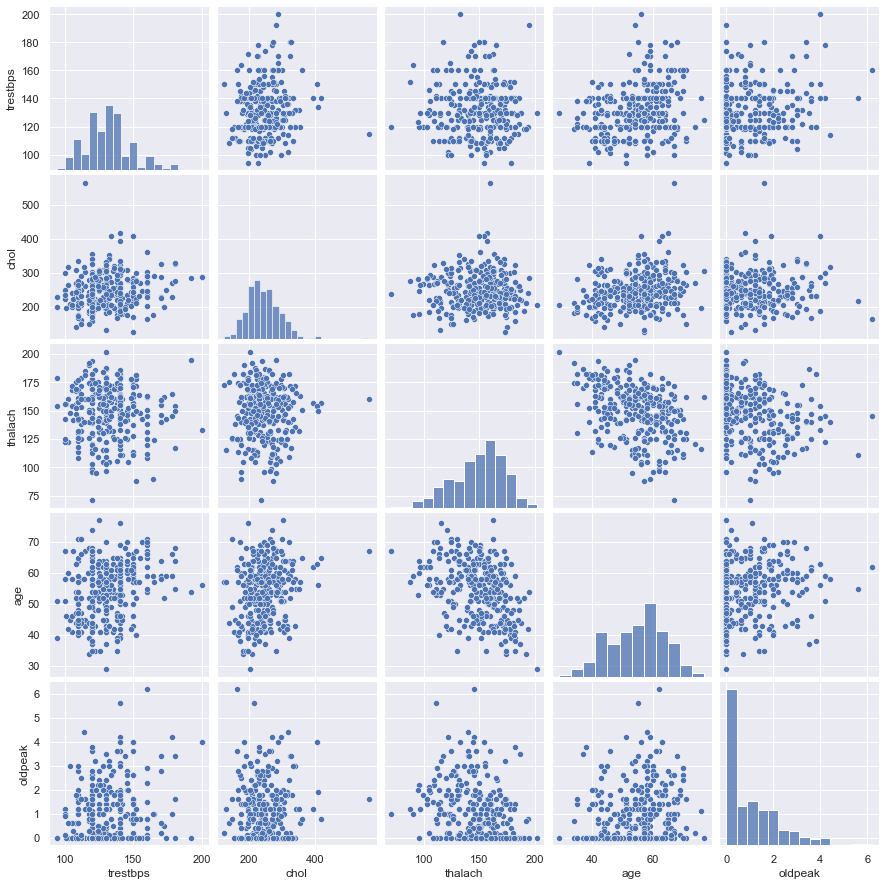

In [106]:
sns.pairplot(heart[numeric_columns])

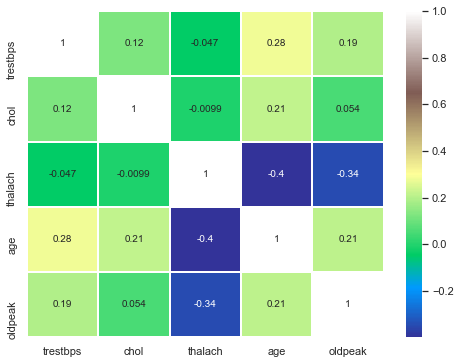

In [107]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

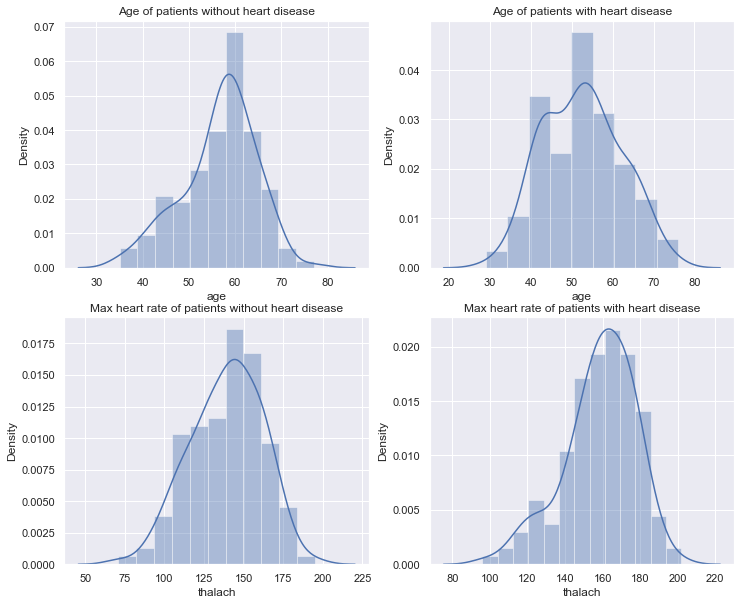

In [108]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

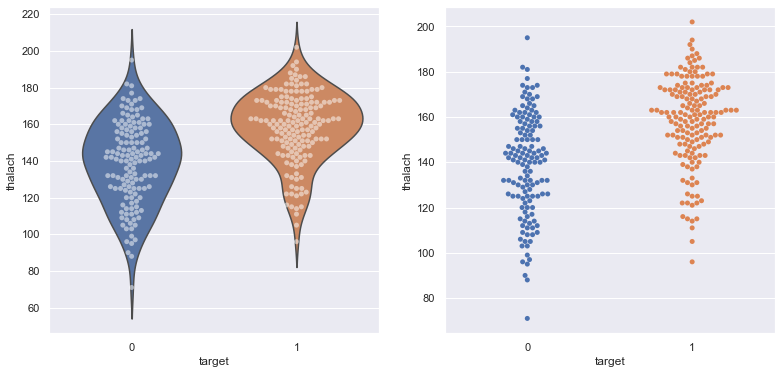

In [109]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

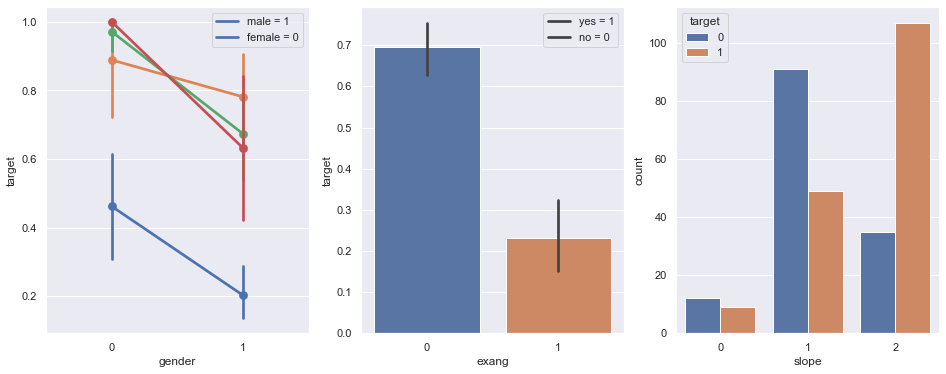

In [110]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="gender", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [111]:
heart.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [112]:
heart.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables

In [113]:
#Creating dummy variable
a = pd.get_dummies(heart['cp'], prefix='cp')
b = pd.get_dummies(heart['thal'], prefix='thal')
c = pd.get_dummies(heart['slope'], prefix='slope')

In [114]:
frames = [heart,a,b,c]
heart = pd.concat(frames, axis=1)
heart.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [115]:
heart = heart.drop(columns = ['cp', 'thal', 'slope'])
heart.head()

,age,gender,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [116]:
X = heart.drop(['target'], axis=1)
y = heart['target']

In [117]:
X.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [118]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [119]:
X.shape

(303, 21)

In [120]:
y.shape

(303,)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [122]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (181, 21)
train_set_y shape: (181,)
test_set_x shape: (122, 21)
test_set_y shape: (122,)


### LOGISTIC REGRESSION

In [123]:
#Various Algorithms
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
X_train_prediction_lr = lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, y_train)

In [124]:
print('Accuracy on Training data : ', training_data_accuracy_lr*100)

Accuracy on Training data :  86.74033149171271


In [125]:
# accuracy on test data
X_test_prediction_lr = lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, y_test)

In [126]:
print('Accuracy on Test data : ',test_data_accuracy_lr*100)

Accuracy on Test data :  85.24590163934425


### SVC

In [127]:
#Support vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
X_train_prediction_svc = svc.predict(X_train)
training_data_accuracy_svc = accuracy_score(X_train_prediction_svc, y_train)


In [128]:
print('Accuracy on Training data : ', training_data_accuracy_svc*100)

Accuracy on Training data :  63.53591160220995


In [129]:
# accuracy on test data
X_test_prediction_svc = svc.predict(X_test)
test_data_accuracy_svc = accuracy_score(X_test_prediction_svc, y_test)

In [130]:

print('Accuracy on Test data : ',test_data_accuracy_svc*100)

Accuracy on Test data :  69.67213114754098


### K-NEAREST CLASSIFIER

In [131]:
#K-NEAREST CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, y_train)

In [132]:
print('Accuracy on Training data : ', training_data_accuracy_knn*100)

Accuracy on Training data :  79.55801104972376


In [133]:
# accuracy on test data
X_test_prediction_knn = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)

In [134]:
print('Accuracy on Test data : ',test_data_accuracy_knn*100)

Accuracy on Test data :  66.39344262295081


In [135]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [136]:
scores

{1: 0.5737704918032787,
 2: 0.5655737704918032,
 3: 0.6639344262295082,
 4: 0.639344262295082,
 5: 0.6639344262295082,
 6: 0.6639344262295082,
 7: 0.6475409836065574,
 8: 0.639344262295082,
 9: 0.639344262295082,
 10: 0.680327868852459,
 11: 0.680327868852459,
 12: 0.6557377049180327,
 13: 0.6967213114754098,
 14: 0.6557377049180327,
 15: 0.680327868852459,
 16: 0.6885245901639344,
 17: 0.6967213114754098,
 18: 0.6967213114754098,
 19: 0.7295081967213115,
 20: 0.6967213114754098,
 21: 0.7049180327868853,
 22: 0.680327868852459,
 23: 0.680327868852459,
 24: 0.6885245901639344,
 25: 0.6721311475409836}

In [137]:
px.line(x=k_range,y=scores_list)

### DECISION TREE CLASSIFIER

In [138]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)

In [139]:
print('Accuracy on Training data : ', training_data_accuracy_dt*100)

Accuracy on Training data :  100.0


In [140]:
# accuracy on test data
X_test_prediction_dt = dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)

In [141]:
print('Accuracy on Test data : ',test_data_accuracy_dt*100)

Accuracy on Test data :  77.8688524590164


### RANDOM FOREST CLASSIFIER

In [142]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, y_train)

In [143]:
print('Accuracy on Training data : ', training_data_accuracy_rf*100)

Accuracy on Training data :  100.0


In [144]:
# accuracy on test data
X_test_prediction_rf = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, y_test)

In [145]:
print('Accuracy on Test data : ',test_data_accuracy_rf*100)

Accuracy on Test data :  83.60655737704919


### NAIVE BAYES

In [146]:
#NAIVE BAIYES
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
X_train_prediction_nb = nb.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, y_train)

In [147]:
print('Accuracy on Training data : ', training_data_accuracy_nb*100)

Accuracy on Training data :  81.76795580110497


In [148]:
# accuracy on test data
X_test_prediction_nb = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, y_test)

In [149]:
print('Accuracy on Test data : ',test_data_accuracy_nb*100)

Accuracy on Test data :  72.95081967213115


In [150]:
test_models = pd.DataFrame({
    'Models':[ 'Random Forest','Logistic Regression','KNN','Support Vector',  'Decision Tree',  'Naive Bayes'],
    'Score(Test Data)':[test_data_accuracy_rf,test_data_accuracy_lr,test_data_accuracy_knn,test_data_accuracy_svc ,test_data_accuracy_dt,test_data_accuracy_nb]
})

test_models.sort_values(by='Score(Test Data)', ascending=False)

,Models,Score(Test Data)
1,Logistic Regression,0.852459
0,Random Forest,0.836066
4,Decision Tree,0.778689
5,Naive Bayes,0.729508
3,Support Vector,0.696721
2,KNN,0.663934


In [151]:
#MODEL EVALUATIONS

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
rf
lr_pred = lr.predict(X_test)

In [154]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.88      0.86      0.87        70

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85      0.85       122



In [155]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, lr_pred)

In [156]:
cm

array([[44,  8],
       [10, 60]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

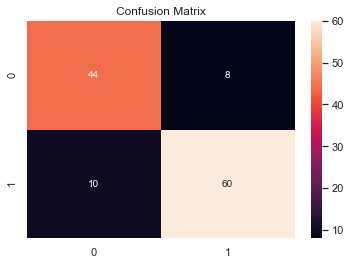

In [157]:

#VISUALIZE
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')

In [158]:
#BUILDING PREDICTIVE MODEL
input_data = (34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('This Person does not have Heart Disease')
else:
  print('This Person has Heart Disease')

[0]
This Person does not have Heart Disease


In [159]:
algorithms=['Random Forest','Logistic Regression','KNN','Support Vector',  'Decision Tree',  'Naive Bayes']
scores=[test_data_accuracy_rf,test_data_accuracy_lr,test_data_accuracy_knn,test_data_accuracy_svc ,test_data_accuracy_dt,test_data_accuracy_nb]

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

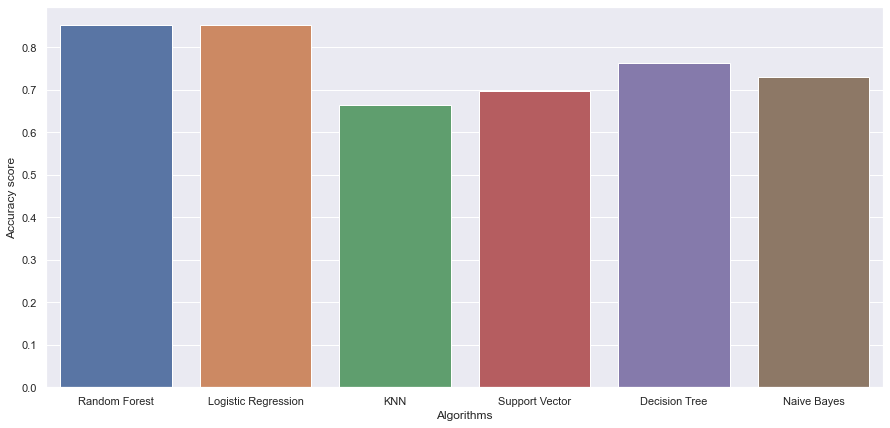

In [80]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)